# EDA

 1. 데이터 불러오기
 2. 데이터 정보 관측하기
 3. 데이터 크기 파악하기
 4. 데이터 피쳐 알아보기

In [1]:
# 0. 라이브러리 불러오기
import pandas as pd

In [2]:
# 1 ~ 4
# csv파일을 df으로 불러오기
train = pd.read_csv('../data/와인/train.csv')
test = pd.read_csv('../data/와인/test.csv')


print('train data 확인')
train.info()

# 행, 열 확인
print('train data shape? :',train.shape)
print('test data shape? :',test.shape)

print('train data 속 각 칼럼의 정보 확인')
train.head()

train data 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ K

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


#### 결측치 유무 확인

다행히 train, test데이터 모두 결측치가 존재하진 않음

In [3]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [4]:
test.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

#### 수치형 데이터 요약하기 : `describe()`

다양한 통계량을 요약하주는 메서드. 데이터프레임 각 열(only 수치형 데이터)에 대해 요약이 수행

**describe에서 제공하는 통계량**
- count, mean, std, min, 1분위수, 2분위수, 3분위수, max

In [5]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


## EDA - **시각화**

- 종속변수(quality) : 우리가 예측하고자 하는 변수
- 시각화할 때는 복사본 생성 후 진행 : `copy()`

### matplotlib, seaborn 라이브러리
종속변수 분포 시각화 > 머신러닝의 방향성 파악

In [7]:
# 한글 글꼴 다운
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 결과 출력 설정
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # 글꼴
plt.rc('axes', unicode_minus=False) # '-' 출력

import warnings # 분석에 문제없는 경고 메시지 숨기기
warnings.filterwarnings('ignore')


In [9]:
train = pd.read_csv('../data/와인/train.csv')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


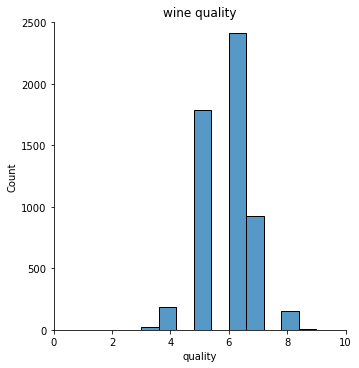

In [10]:
# 분석을 위해 학습용 데이터 복사
traindata = train.copy()

# 타겟 변수(와인 품질) 분포 시각화
sns.displot(traindata['quality'], kde=False, bins=10)
plt.axis([0,10,0,2500])
plt.title('wine quality') # 제목
plt.show() # 그래프 그리기